# Importing the libraries

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.preprocessing import PowerTransformer

# Importing data

In [2]:
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')
sub_df = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')

In [3]:
data

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [4]:
data.isnull().sum().sum()

0

In [5]:
sub_df

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
97995,97995,0
97996,97996,0
97997,97997,0
97998,97998,0


# Checking correlation between data

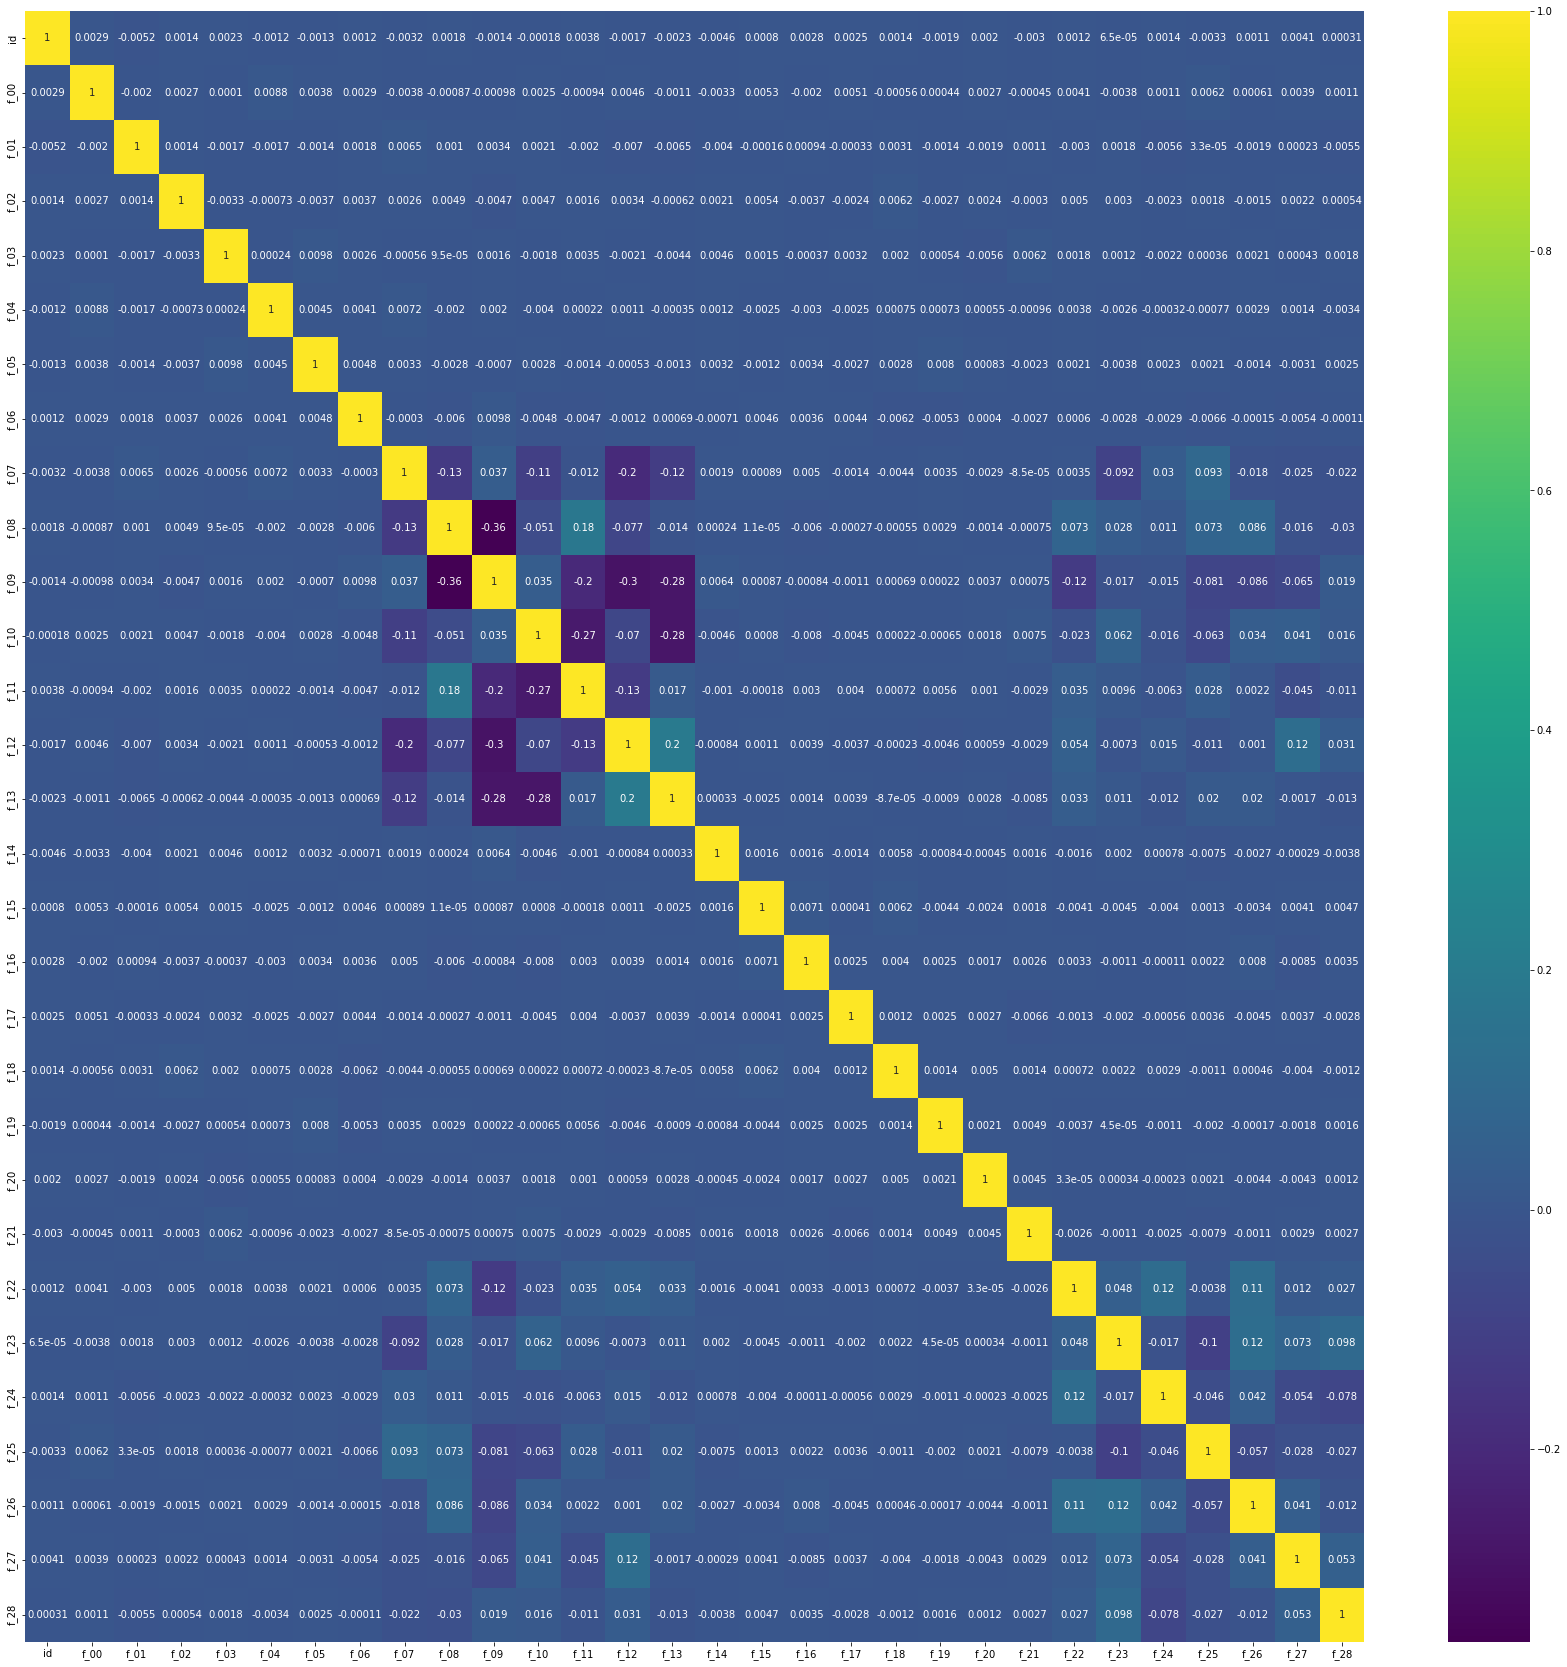

In [6]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

In [7]:
data=data.drop(columns='id',axis=1)
data

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


# Applying min max scaler to the data

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.47088039, 0.38579887, 0.56236109, ..., 0.60389367, 0.60506425,
        0.5575702 ],
       [0.43837067, 0.43960402, 0.56294554, ..., 0.45361261, 0.54313508,
        0.30676318],
       [0.60083056, 0.53089652, 0.35876942, ..., 0.60574954, 0.42807753,
        0.23855836],
       ...,
       [0.4860663 , 0.43894838, 0.70078941, ..., 0.66185912, 0.61765162,
        0.54521955],
       [0.54686935, 0.74908597, 0.5749394 , ..., 0.40085068, 0.46207862,
        0.49442189],
       [0.59498531, 0.55938174, 0.65274841, ..., 0.44535679, 0.60107472,
        0.4481314 ]])

In [9]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.467078,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.472326,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.473940,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.583177,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.345402,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.538866,0.687147,0.412625,0.514201,0.493436,0.513801,0.731116,0.15625,0.233333,0.181818,...,0.486993,0.489957,0.404091,0.615567,0.603631,0.649153,0.451594,0.410276,0.524980,0.531120
97996,0.548093,0.576142,0.552702,0.319744,0.486603,0.497475,0.570450,0.09375,0.300000,0.045455,...,0.530125,0.670252,0.557591,0.638793,0.516049,0.546457,0.548608,0.522255,0.572857,0.551405
97997,0.486066,0.438948,0.700789,0.317533,0.550976,0.415183,0.507669,0.25000,0.300000,0.227273,...,0.427752,0.322461,0.369744,0.400671,0.712424,0.606804,0.480162,0.661859,0.617652,0.545220
97998,0.546869,0.749086,0.574939,0.528828,0.582414,0.484191,0.512812,0.03125,0.266667,0.250000,...,0.516531,0.640757,0.700281,0.540071,0.614587,0.588578,0.428321,0.400851,0.462079,0.494422


# Applying power transformer to the scaled data
Power transformer helps the data to be more Gaussian in nature.

In [62]:
transformer = PowerTransformer()
X=transformer.fit_transform(scaled_data)
X=pd.DataFrame(X,columns=data.columns)
X

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389214,-0.917518,0.648184,0.590733,-0.824830,0.734791,2.258134,-1.025849,1.416210,1.104639,...,-0.472748,-0.753695,-0.763212,-0.707791,0.911229,-0.678686,0.767970,0.960472,1.044386,0.691742
1,-0.688325,-0.458498,0.653412,0.995461,-1.644219,0.864939,-0.085516,-1.025849,-0.917129,-0.219888,...,-0.423388,-0.087946,-1.778423,-0.536486,0.452440,1.032013,-0.121349,-0.553160,0.365367,-1.629495
2,0.805725,0.319495,-1.167436,-0.622222,0.108491,0.785100,1.989697,0.000862,1.044870,-0.453010,...,-0.408211,-1.598967,1.194044,2.209144,0.085171,-1.518493,-0.569121,0.979172,-0.924692,-2.293146
3,-0.500442,0.224096,0.263219,0.233988,0.417139,-1.218955,0.144512,0.285546,-1.235141,0.979536,...,0.620439,1.283707,0.533223,0.730931,-1.217490,0.826850,-1.169549,-0.398167,-0.102924,0.321333
4,-0.670385,-1.044376,-0.270384,-1.833582,-0.285854,-1.849885,0.787759,0.786547,0.175188,-0.453010,...,-1.615472,-0.432155,0.322408,0.225497,-1.480612,0.848376,-0.614018,1.166206,-0.376097,-1.154639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.236069,1.648773,-0.688295,0.316043,-0.294757,0.330457,1.610842,0.000862,0.175188,0.192392,...,-0.285416,-0.255738,-0.972513,0.953431,0.406402,1.284405,-0.079067,-0.989387,0.164325,0.454939
97996,0.320916,0.704703,0.561788,-1.321882,-0.353242,0.183407,0.184287,-0.651268,0.633441,-1.285728,...,0.120574,1.383543,0.342341,1.160710,-0.430928,0.271139,0.783398,0.138034,0.692538,0.636705
97997,-0.249518,-0.464089,1.888977,-1.340573,0.197804,-0.557715,-0.375649,0.786547,0.633441,0.543752,...,-0.842416,-1.784465,-1.265657,-0.994163,1.452140,0.867502,0.176857,1.544650,1.181158,0.581387
97998,0.309663,2.174966,0.760727,0.438804,0.466949,0.063762,-0.329720,-1.438508,0.410645,0.700049,...,-0.007420,1.115781,1.571116,0.275479,0.511442,0.687681,-0.288806,-1.084249,-0.539431,0.123458


# Now applying Gaussian Mixture(The ultimate clustering algorithm)

In [55]:
gm=GaussianMixture(n_components=7,random_state=1)
gm_labels=gm.fit_predict(X)

In [56]:
gm_labels

array([3, 6, 3, ..., 1, 0, 5])

# Building the submission dataframe

In [58]:
sub=pd.DataFrame({'Id':sub_df['Id'],'Predicted':gm_labels})

In [59]:
sub

,Id,Predicted
0,0,3
1,1,6
2,2,3
3,3,2
4,4,4
...,...,...
97995,97995,6
97996,97996,5
97997,97997,1
97998,97998,0


In [60]:
sub['Predicted'].value_counts()

4    16259
1    15844
5    15604
3    13648
6    12529
2    12341
0    11775
Name: Predicted, dtype: int64

# Making the submission CSV file

In [61]:
sub.to_csv('submission5.csv',index=None)

# Thanks for reading this notebook. If you like then upvote it.